In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chalampp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
new_train=pd.read_csv("web_categ_final.csv")
new_train.shape

(53447, 3)

In [3]:
new_train.head()

,Webpage_id,Tag,text
0,1,news,b' Skip to main content ...
1,2,news,b' Skip to main content ...
2,3,news,b' Skip to main content ...
3,4,news,"b"" Skip to main content ..."
4,5,news,"b"" Skip to main content ..."


In [4]:
new_train['Tag'].value_counts()

others            17417
news               7992
publication        7705
profile            5196
conferences        4666
forum              4503
clinicalTrials     2839
thesis             1800
guidelines         1329
Name: Tag, dtype: int64

As this data has been extracted from website, there will be lot of noise in it. Hence Preprocessing of text is very important.

In [7]:
for text in new_train['text'][5]:
    print(text)

b
"
 
 
 
 
S
k
i
p
 
t
o
 
m
a
i
n
 
c
o
n
t
e
n
t
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
T
w
i
t
t
e
r
 
 
L
i
n
k
e
d
I
n
 
 
 
 
 
 
S
e
a
r
c
h
 
 
 
 
 
 
 
 
 
 
 
T
o
p
 
M
e
n
u
 
 
 
 
D
D
F
 
2
0
1
7
 
 
 
 
F
i
e
r
c
e
B
i
o
t
e
c
h
 
 
 
 
J
o
b
s
 
 
 
 
R
e
s
o
u
r
c
e
s
 
 
 
 
E
v
e
n
t
s
 
 
 
 
S
u
b
s
c
r
i
b
e
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
M
a
i
n
 
n
a
v
i
g
a
t
i
o
n
 
 
 
 
P
h
a
r
m
a
 
 
 
 
M
&
A
 
 
 
 
R
e
g
u
l
a
t
o
r
y
 
 
 
 
F
i
n
a
n
c
i
a
l
s
 
 
 
 
C
o
r
p
o
r
a
t
e
 
 
 
 
L
e
g
a
l
 
 
 
 
 
 
M
a
n
u
f
a
c
t
u
r
i
n
g
 
 
 
 
M
&
A
 
 
 
 
O
u
t
s
o
u
r
c
i
n
g
 
 
 
 
R
e
g
u
l
a
t
o
r
y
 
 
 
 
S
u
p
p
l
y
 
C
h
a
i
n
 
 
 
 
P
a
r
t
n
e
r
i
n
g
 
 
 
 
D
r
u
g
 
S
a
f
e
t
y
 
 
 
 
 
 
M
a
r
k
e
t
i
n
g
 
 
 
 
R
e
g
u
l
a
t
o
r
y
 
 
 
 
D
T
C
 
A
d
v
e
r
t
i
s
i
n
g
 
 
 
 
D
i
g
i
t
a
l
 
a
n
d
 
S
o
c
i
a
l
 
M
e
d
i
a
 
 
 
 
D
a
t
a
 
a
n
d
 
A
n
a
l
y
t
i
c
s
 
 
 
 
L
a
u
n
c
h
e
s
 
 
 
 
 
 
P


In [8]:
for text in new_train['text'][:5]:
    print("\n\n",text)



 b'    Skip to main content                                    Twitter  LinkedIn      Search           Top Menu    DDF 2017    FierceBiotech    Jobs    Resources    Events    Subscribe                  Main navigation    Pharma    M&A    Regulatory    Financials    Corporate    Legal      Manufacturing    M&A    Outsourcing    Regulatory    Supply Chain    Partnering    Drug Safety      Marketing    Regulatory    DTC Advertising    Digital and Social Media    Data and Analytics    Launches      Pharma Asia    M&A    R&D    Regulatory    Sales and Marketing    Financials    Manufacturing      Animal Health    R&D    M&A    Regulatory    Veterinarian    Financials    Vaccines      Drug Delivery    R&D    Regulatory    Partnering      Vaccines    Deals    Infectious Diseases    R&D    Regulatory        Main navigation - Mobile    Pharma    M&A    Regulatory    Financials    Corporate    Legal      Manufacturing    M&A    Outsourcing    Regulatory    Supply Chain    Partnering    Drug Sa

When we simple iterate text without index, system crashes.

In [9]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text):
    #converting to lowercase
    newString = text.lower()
    #removing links
    newString = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', newString) 
    #removing text inside ()
    newString = re.sub(r'\([^)]*\)', '', newString)
    #removing text inside []
    newString = re.sub(r'\{[^)]*\}', '', newString)
    #fetching alphabetic characters
    newString = re.sub("[^a-zA-Z]", " ", newString)
    #removing stop words
    tokens = [w for w in newString.split() if not w in stop_words] 
    long_words=[]
    for i in tokens:
        #removing short words
        if len(i)>=4:                                                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [10]:
text1 = new_train['text'][2]
clean_text1 = text_cleaner(text1)
print("Before cleaning:\n",text1)
print("After cleaning:\n",clean_text1)

Before cleaning:
 b'    Skip to main content                                    Twitter  LinkedIn      Search           Top Menu    DDF 2017    FierceBiotech    Jobs    Resources    Events    Subscribe                  Main navigation    Pharma    M&A    Regulatory    Financials    Corporate    Legal      Manufacturing    M&A    Outsourcing    Regulatory    Supply Chain    Partnering    Drug Safety      Marketing    Regulatory    DTC Advertising    Digital and Social Media    Data and Analytics    Launches      Pharma Asia    M&A    R&D    Regulatory    Sales and Marketing    Financials    Manufacturing      Animal Health    R&D    M&A    Regulatory    Veterinarian    Financials    Vaccines      Drug Delivery    R&D    Regulatory    Partnering      Vaccines    Deals    Infectious Diseases    R&D    Regulatory        Main navigation - Mobile    Pharma    M&A    Regulatory    Financials    Corporate    Legal      Manufacturing    M&A    Outsourcing    Regulatory    Supply Chain    Partne

In [11]:
cleaned_text=[]
for i in new_train['text']:
    cleaned_text.append(text_cleaner(i))

### Label Encoding

In [16]:
# converting the output label to integer using label encoder

new_train['Tag'].sample(5)

28748         others
5279          thesis
10135    conferences
51113           news
47363     guidelines
Name: Tag, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(new_train['Tag'])

In [18]:
y

array([4, 4, 4, ..., 6, 6, 6])

### Validaiton Split

In [19]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(cleaned_text,y,test_size=0.3,random_state=0,shuffle=True)

### Padding

#### Making sure that all of the sequence of dataset is consistent length. This happens a lot in Text based or Time Series problems where one sequence might have 10 words and another sequence of 20 words

Distribution of sequence

we create the distribution for the length of the sequences and fix the maximum length of sequence which is required for building the model

In [20]:
import matplotlib.pyplot as plt

text_word_count = []

#populate the lists with sentence lengths
for i in cleaned_text:
      text_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count})

length_df.hist(bins = 100, range=(0,10000))
plt.show()

<Figure size 640x480 with 1 Axes>

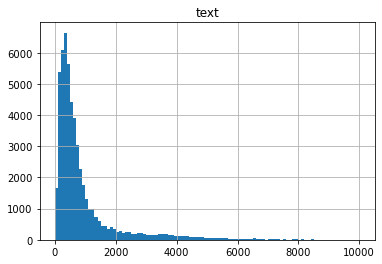

In [24]:
length_df.hist(bins = 100, range=(0,10000))
plt.show()

From the above histogram, we observe that most of the sequences fall under the length of 500. So, let us fix maximum length of sequence to 500.

In [25]:
max_len=500

Before we pad, another important thing is to convert the text into tokens and to label encode them. Earlier we have encoded tags, now we have to encode all the individual words present in the cleaned text. Becuase ML and DL works with only numbers not on text.

Essentialy these text converts into some kind of representation like bag of words, tfidf, embeddings like word2vec, etc. Another way is assinging number to each of the word that appears in entire text and representing this sequence of words as sequence of numbers. This is what we usually do in Deep Learning.

In [26]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
#creating index for a wor
tokenizer.fit_on_texts(list(x_tr))

#converting word seq to integer seq
x_tr    =   tokenizer.texts_to_sequences(x_tr) 
x_val   =   tokenizer.texts_to_sequences(x_val)

#padding up with zero 
x_tr    =   pad_sequences(x_tr,  maxlen=max_len, padding='post')
x_val   =   pad_sequences(x_val, maxlen=max_len, padding='post')

vocabulary   =  len(tokenizer.word_index) +1
print("Vocabulary size:",vocabulary)

Vocabulary size: 467704


In [29]:
#sequence encoding and padding
print(x_tr.shape)
print(x_val.shape)

(37412, 500)
(16035, 500)


In [30]:
x_tr[7128] # see the sequence of numbers along with padding

array([   364,    178,     91,    959,   2157,    362,     35,   1506,
          419,   1398,   1561,    419,    319,    319,   2587,    319,
         3589,   1852,    357,     77,    279,     77,    141,    123,
          163,    371,    279,     48,     71,     10,    809,    321,
          447,     33,    212,     33,   7673,   5287,   2394,    140,
           70,    380,    350,     19,     10,    312,     99,    212,
         2779,   1987,   1225,     91,    268,    357,    160,    323,
         7047,     44,   8007,    166,   2979,     16,    106,     16,
          226,     91,      7,    565,     59,   1529,     48,      7,
          565,     59,     16,    180,     16,    265,      7,    232,
            7,    202,    415,    163,   1831,    153,    156,      7,
           62,    162,    111,    826,   5202,     70,   3961,    153,
         2642,    530,      9,   2642,   1236,      9,    709,    273,
           93,    281,    843,   3025,    843,    622,   4311,     14,
      

In [31]:
#showing word index 
tokenizer.word_index # mapping of word to index

{'cancer': 1,
 'health': 2,
 'research': 3,
 'patients': 4,
 'google': 5,
 'pubmed': 6,
 'article': 7,
 'cells': 8,
 'view': 9,
 'information': 10,
 'scholar': 11,
 'clinical': 12,
 'cell': 13,
 'study': 14,
 'care': 15,
 'search': 16,
 'conference': 17,
 'medical': 18,
 'contact': 19,
 'treatment': 20,
 'patient': 21,
 'data': 22,
 'medicine': 23,
 'news': 24,
 'university': 25,
 'disease': 26,
 'also': 27,
 'science': 28,
 'international': 29,
 'results': 30,
 'development': 31,
 'home': 32,
 'journal': 33,
 'time': 34,
 'email': 35,
 'using': 36,
 'management': 37,
 'group': 38,
 'share': 39,
 'site': 40,
 'expression': 41,
 'center': 42,
 'services': 43,
 'find': 44,
 'analysis': 45,
 'human': 46,
 'products': 47,
 'authors': 48,
 'policy': 49,
 'hospital': 50,
 'global': 51,
 'overview': 52,
 'central': 53,
 'free': 54,
 'first': 55,
 'tumor': 56,
 'related': 57,
 'studies': 58,
 'abstract': 59,
 'society': 60,
 'people': 61,
 'full': 62,
 'support': 63,
 'used': 64,
 'media': 65,

The output labels are converted into one hot vectors.

In [32]:
# Converting target variables into one hot encoded

from keras.utils.np_utils import to_categorical
y_tr=to_categorical(y_tr,num_classes=9)
y_val=to_categorical(y_val,num_classes=9)

In [33]:
# this is y appears in the begining with Label Encoding now we are doing one hot encoding

y

array([4, 4, 4, ..., 6, 6, 6])

We use softmax activation in the output and it give probabilities for each class (9 classes)

In [37]:
print("Old format of y: ",y)

print("New 2 dimensional format of y: ","[[0,0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],........[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0,0]]")

Old format of y:  [4 4 4 ... 6 6 6]
New 2 dimensional format of y:  [[0,0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],........[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0,0]]


In [38]:
y_tr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

So that the model is able to get use to kind of the output going to get. 

In model builing, we are using word embedding...

Vimportant: Word Embedding is basically an replacement for word2vec or Glove

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint 
import keras.backend as K
K.clear_session()

# LSTM model
model=Sequential()
model.add(Embedding(vocabulary,100,input_length=max_len,trainable=True, mask_zero=True)) 
model.add(LSTM(300,dropout=0.1, recurrent_dropout=0.2)) 
model.add(Dense(64,activation='relu')) 
model.add(Dense(9,activation='softmax')) 
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          46770400  
_________________________________________________________________
lstm (LSTM)                  (None, 300)               481200    
_________________________________________________________________
dense (Dense)                (None, 64)                19264     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 585       
Total params: 47,271,449
Trainable params: 47,271,449
Non-trainable params: 0
_________________________________________________________________
None


EarlyStopping, ModelCheckpoint 

This is a very important utility, say when we run the model for 1000 Epochs after 200 epochs if model is with improved performance and there is no drastic change then it stops here and save the model, we can reload that make predictions.

15.52

Embedding Layer need to pass the vocabulary size (100-size of the embedding) of th training data (50000). 100 is basically what size of embedding we want to learn from text. Each word will be represented by vector of 100 numbers. This is similar to Word2vec


input_lenght tells the size of the each sequence


mask_zero = True;means the padding that we did earlier by adding zero numbers...basically we telling the model these zeros don't add any information to the model, do not take them as training data. So all the zeros added during the model will be ignored. There won't be loss calculated and gradients updatedfor those values.

model.add(Dense(9,activation='softmax'))

As we have nine classes we have 9 classes in the predictions.

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["acc"]) 

Nice notes is available in the main notebook

In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)  
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)  

In [43]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=1200,epochs=100,validation_data=(np.array(x_val),np.array(y_val)),verbose=1,callbacks=[es,mc])

This data is huge, it would be advisable to run on the GPU enabled machine on Cloud. Each epoch is taking 74s hence better run in cloud

We should always try with GRU first as their training time is fast compare to LSTM